## Analysis of selected features

(Shristi Pandey)

In this section, I will generate use to feature importance generated by all the models to find out whats general among the different models and also what is the difference between the different impute levels. 

In [3]:
import pandas as pd 
import datetime
import numpy as np 
import scipy as sp
from scipy.stats import mode
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from joblib import dump, load

In [4]:
#load feature Importances for all levels for different levels of imputations: 
rf_30pc_mean = pd.read_csv('../data/Models/Feature_Importance/RandomForestClassifier_mean_upto_30.csv', index_col=0) 
ab_30pc_mean = pd.read_csv('../data/Models/Feature_Importance/AdaBoostClassifier_mean_upto_30.csv', index_col=0)
bg_30pc_mean = pd.read_csv('../data/Models/Feature_Importance/BaggingClassifier_mean_upto_30.csv', index_col=0)
lr_30pc_mean = pd.read_csv('../data/Models/Feature_Importance/LogisticRegression_mean_upto_30.csv', index_col=0)

rf_50pc_model = pd.read_csv('../data/Models/Feature_Importance/RandomForestClassifier_modeled_upto_50.csv', index_col=0) 
ab_50pc_model = pd.read_csv('../data/Models/Feature_Importance/AdaBoostClassifier_modeled_upto_50.csv', index_col=0)
bg_50pc_model = pd.read_csv('../data/Models/Feature_Importance/BaggingClassifier_modeled_upto_50.csv', index_col=0)
lr_50pc_model = pd.read_csv('../data/Models/Feature_Importance/LogisticRegression_modeled_upto_50.csv', index_col=0)


In [5]:
rf = rf_50pc_model.mean()
ab = ab_50pc_model.mean()
lr = lr_50pc_model.mean()
bg = bg_50pc_model.mean()
features_50pc = pd.concat([rf.rename('rf'), ab.rename('ab'),  lr.rename('lr'), bg.rename('bg')], axis=1)
features_50pc.head()
features = features_50pc.index

In [6]:
from sklearn import preprocessing

x = features_50pc.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
features_50pc_scaled = min_max_scaler.fit_transform(x)
features_50pc_scaled = pd.DataFrame(features_50pc_scaled)
features_50pc_scaled.columns = ['RandomForest', 'Adaboost', 'Logistic Regression', 'Bagging']

In [7]:
features_50pc_scaled.head()

,RandomForest,Adaboost,Logistic Regression,Bagging
0,0.077825,0.304721,0.291966,0.007244
1,0.047569,0.014145,0.625673,0.006113
2,0.303470,0.303656,0.606002,0.077202
3,0.276460,0.192507,0.569673,0.046042
4,0.271000,0.724132,0.550664,0.029178


In [8]:
features_50pc_scaled['feature'] = features_50pc.index

In [9]:
features_50pc_ordered_rf= features_50pc_scaled.sort_values(by = 'RandomForest', axis=0, ascending=False)
features_50pc_ordered_rf = features_50pc_ordered_rf.head(100)

features_50pc_ordered_bg = features_50pc_scaled.sort_values(by = 'Bagging', axis=0, ascending=False)
features_50pc_ordered_bg = features_50pc_ordered_bg.head(100)

features_50pc_ordered_ab = features_50pc_scaled.sort_values(by = 'Adaboost', axis=0, ascending=False)
features_50pc_ordered_ab = features_50pc_ordered_ab.head(100)

features_50pc_ordered_lr = features_50pc_scaled.sort_values(by = 'Logistic Regression', axis=0, ascending=False)
features_50pc_ordered_lr = features_50pc_ordered_lr.head(100)


## Relationship between the feature importances of different models

In [10]:
#lets look at the top 50 features
features_50pc_ordered_rf_melt = pd.melt(features_50pc_ordered_rf.head(50), id_vars="feature", var_name="model", value_name="importance")
features_50pc_ordered_lr_melt = pd.melt(features_50pc_ordered_lr.head(50), id_vars="feature", var_name="model", value_name="importance")
features_50pc_ordered_ab_melt = pd.melt(features_50pc_ordered_ab.head(50), id_vars="feature", var_name="model", value_name="importance")
features_50pc_ordered_bg_melt = pd.melt(features_50pc_ordered_bg.head(50), id_vars="feature", var_name="model", value_name="importance")

Text(0.5,1,'Feature Importance 50pc ordered by the importance computed for Random Forest')

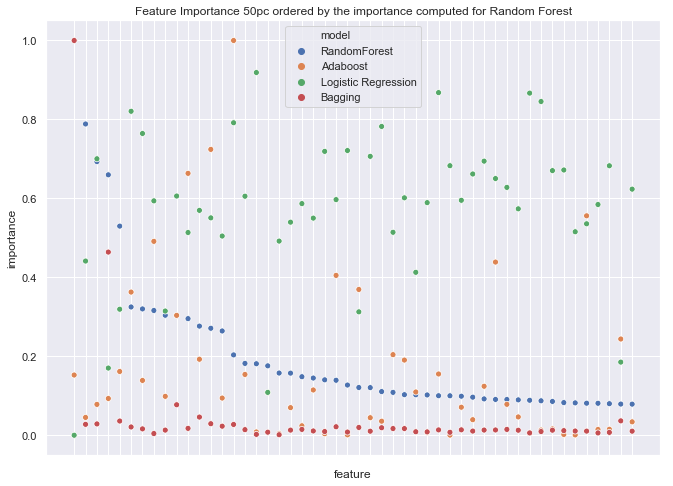

In [11]:
# lets plot the features as ordered by 
sns.set()
plt.figure(figsize=(11,8))
ax = sns.scatterplot(x = 'feature', y = 'importance', hue = 'model', data = features_50pc_ordered_rf_melt)
#sns.barplot(x = 'feature', y = 'ab', data = features_30pc_ordered_melt.head(40))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Feature Importance 50pc ordered by the importance computed for Random Forest')

Text(0.5,1,'Feature Importance 30pc ordered by the importance computed for Adaboost')

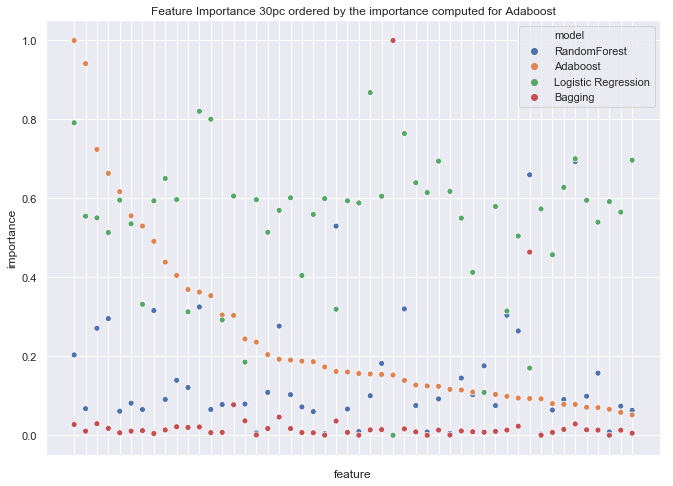

In [12]:
sns.set()
plt.figure(figsize=(11,8))
ax = sns.scatterplot(x = 'feature', y = 'importance', hue = 'model', data = features_50pc_ordered_ab_melt)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Feature Importance 30pc ordered by the importance computed for Adaboost')

Text(0.5,1,'Feature Importance 30pc ordered by the importance computed for Bagging')

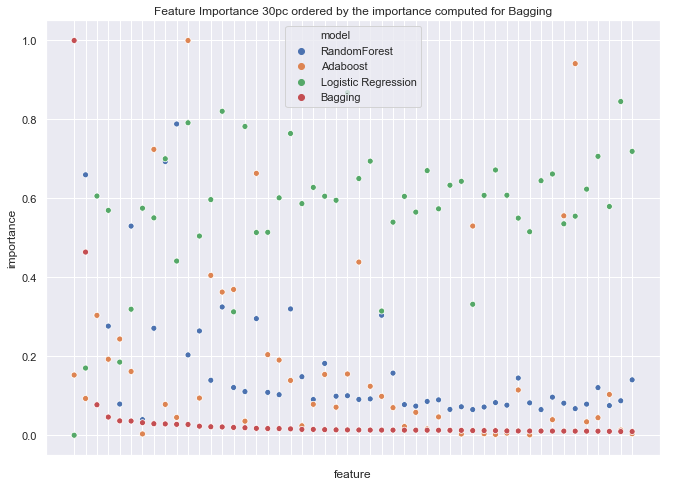

In [13]:
sns.set()
plt.figure(figsize=(11,8))
ax = sns.scatterplot(x = 'feature', y = 'importance', hue = 'model', data = features_50pc_ordered_bg_melt)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Feature Importance 30pc ordered by the importance computed for Bagging')

Text(0.5,1,'Feature Importance 30pc ordered by the importance computed for Logistic Regression')

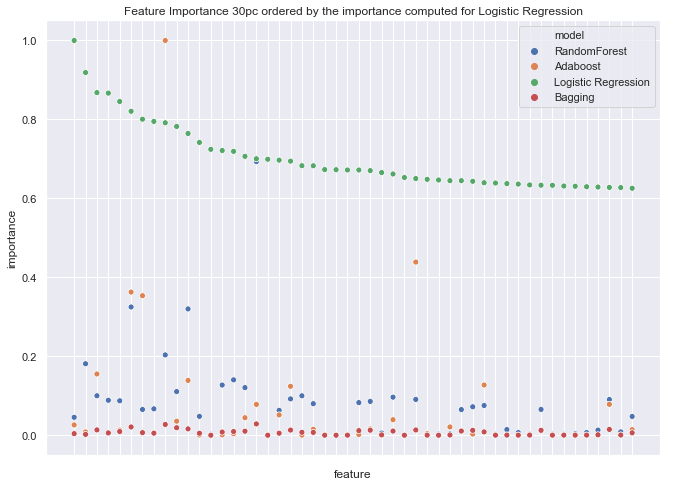

In [14]:
sns.set()
plt.figure(figsize=(11,8))
ax = sns.scatterplot(x = 'feature', y = 'importance', hue = 'model', data = features_50pc_ordered_lr_melt)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Feature Importance 30pc ordered by the importance computed for Logistic Regression')

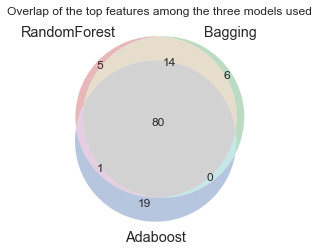

In [19]:
# lets look at the overlap of the top features from all the different models
from matplotlib_venn import venn3
setLabels1 = ['RandomForest','Bagging', 'Adaboost']
setLabels2 = ['RandomForest','Logistic Regression', 'Adaboost']
plt.figure()
ax1 = plt.gca()
v1 = venn3([set(features_50pc_ordered_rf.feature), set(features_50pc_ordered_bg.feature), 
       set(features_50pc_ordered_ab.feature)], set_labels = setLabels1, ax = ax1)
ax1.set_title('Overlap of the top features among the three models used')
plt.savefig('VennDiagram_topFeatures.svg')



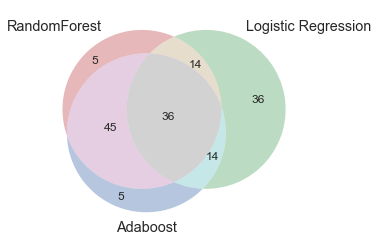

In [21]:
plt.figure()
ax2 = plt.gca()
v2 = venn3([set(features_50pc_ordered_rf.feature), set(features_50pc_ordered_lr.feature), 
       set(features_50pc_ordered_ab.feature)], set_labels = setLabels2, ax = ax2)



## Relationship between feature importance and missingness

We will do this analysis on the top common features of the dataset that were selected by three models (Bagging, Random Forest and Adaboost). See the venn diagram above 

In [39]:
def order_by_num_imputed(orig_data):
    total_patients = orig_data.shape[0]
    #compute the sum of nas in each column in original data: 
    columns = list(orig_data.columns)
    relevant_data = orig_data[columns]
    num_na = pd.DataFrame((relevant_data.isna().sum()/total_patients)*100)
    num_na = num_na.rename(columns={0:'num_na'})
    num_na = num_na.sort_values(['num_na'], ascending=False)
    return num_na


In [40]:
#loading the unimputed data with one hot encoding to get a percent missing on all the columns in the design matrix
missingness = pd.read_csv("../data/Per_Patient/pat_one_hot_encoded.csv")
missingness.head()

,RID,AGE,PTEDUCAT,FDG,AV45,ABETA,TAU,PTAU,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,mPACCdigit,mPACCtrailsB,PTDOBYY,GDTOTAL,HMT100,HMT10,HMT4,...,PTNOTRT_0.0,PTNOTRT_1.0,PTNOTRT_2.0,NXABNORM_0.0,NXABNORM_1.0,BCDIARRH_0.0,BCDIARRH_1.0,BCMUSCLE_0.0,BCMUSCLE_1.0,MH5RESP_0.0,MH5RESP_1.0,BCNAUSEA_0.0,BCNAUSEA_1.0,BCVISION_0.0,BCVISION_1.0,PTRACCAT_0.0,PTRACCAT_1.0,PTRACCAT_2.0,PTRACCAT_3.0,PTRACCAT_4.0,PTRACCAT_5.0,PTRACCAT_6.0,PTGENDER_0.0,PTGENDER_1.0,MH4CARD_0.0,MH4CARD_1.0,BCFALL_0.0,BCFALL_1.0,BCSWEATN_0.0,BCSWEATN_1.0,MH12RENA_0.0,MH12RENA_1.0,BCDROWSY_0.0,BCDROWSY_1.0,DX_bl_0.0,DX_bl_1.0,DX_bl_2.0,DXMPTR4_0.0,DXMPTR4_1.0,DXMPTR4_2.0,BCURNDIS_0.0,BCURNDIS_1.0,BCRASH_0.0,BCRASH_1.0,NXVISUAL_0.0,NXVISUAL_1.0,NXPLANTA_0.0,NXPLANTA_1.0,DXMPTR1_0.0,DXMPTR1_1.0
0,2,74.3,16.0,1.36665,NaN,NaN,NaN,NaN,0.0,10.67,18.67,5.0,28.0,44.0,4.0,6.0,54.5455,10.0,34.0,112.0,0.0,23.0,1.625,1.11111,1.0,1.2,1.16667,1.5,1.25641,1.0,1.33333,1.16667,1.25,1.0,1.25,1.16216,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,-4.34704,-4.14503,1931.0,1.0,28.0,0.42,85.0,...,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,0,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN
1,3,81.3,18.0,1.08355,NaN,741.5,239.7,22.83,4.5,22.00,31.00,8.0,20.0,22.0,1.0,4.0,100.0000,2.0,25.0,148.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,-16.56490,-16.14290,1924.0,1.0,32.0,0.27,93.0,...,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,1,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,1,0,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN
2,4,67.5,10.0,NaN,NaN,1501.0,153.1,13.29,1.0,14.33,21.33,6.0,27.0,37.0,7.0,4.0,36.3636,4.0,25.0,271.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39605.0,6869.0,1154980.0,3983.0,19036.0,19615.0,1679440.0,-8.48672,-9.50593,1938.0,3.0,31.0,0.42,90.0,...,0,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,1,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,5,73.7,16.0,1.29343,NaN,547.3,337.0,33.43,0.0,8.67,14.67,4.0,29.0,37.0,4.0,4.0,44.4444,12.0,38.0,90.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34062.0,7075.0,1116630.0,4433.0,24788.0,21614.0,1640770.0,-1.89234,-1.56394,1931.0,0.0,29.0,0.51,86.0,...,1,0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0,0,0,0,1,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,0,0,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN
4,6,80.4,13.0,NaN,NaN,NaN,NaN,NaN,0.5,18.67,25.67,7.0,25.0,30.0,1.0,5.0,83.3333,3.0,34.0,168.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39826.0,5348.0,927510.0,2277.0,17963.0,17802.0,1485830.0,-10.27850,-11.04030,1925.0,0.0,23.0,0.36,74.0,...,1,0,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [41]:
missing_sorted = order_by_num_imputed(missingness)
missing_sorted['feature'] = missing_sorted.index
missing_sorted.head()

,num_na,feature
CMT2,72.978208,CMT2
CMT3,72.978208,CMT3
AXT117,64.019370,AXT117
BAT324,61.065375,BAT324
DIGITSCOR,60.435835,DIGITSCOR


In [42]:
common_features_across_models = pd.read_csv("../data/Selected_common_features.csv", index_col=0)
common = list(common_features_across_models.feature)


In [43]:
common_features_across_models.head()

,RandomForest,Adaboost,Bagging,feature
7,1.000000,0.152534,1.000000,CDRSB
41,0.788483,0.045131,0.027635,mPACCdigit
16,0.693287,0.078138,0.028650,LDELTOTAL
42,0.659718,0.093110,0.463996,mPACCtrailsB
18,0.529775,0.161513,0.035982,FAQ


In [47]:
selected_common_features = missing_sorted.loc[missing_sorted['feature'].isin(common)]

In [48]:
missing_vs_importance = pd.merge(selected_common_features, common_features_across_models, on = 'feature')

In [49]:
missing_vs_importance.head()

,num_na,feature,RandomForest,Adaboost,Bagging
0,46.295400,AV45,0.276460,0.192507,0.046042
1,39.515738,TAU,0.110579,0.035586,0.018991
2,39.515738,ABETA,0.271000,0.724132,0.029178
3,39.515738,PTAU,0.120904,0.369271,0.019750
4,32.445521,EcogSPOrgan,0.148266,0.023968,0.014787


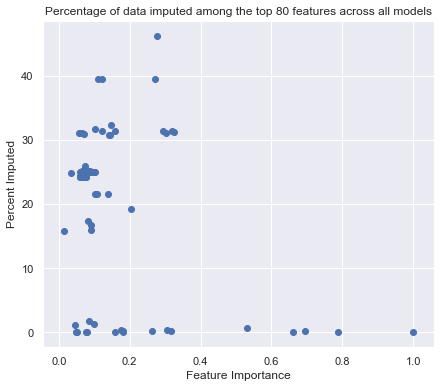

In [52]:
plt.figure(figsize= (7,6))
plt.scatter(x=missing_vs_importance["RandomForest"], y=missing_vs_importance["num_na"])
plt.xlabel('Feature Importance')
plt.ylabel('Percent Imputed')
plt.title('Percentage of data imputed among the top 80 features across all models')
plt.savefig('missingness_Vs_Importance.svg')

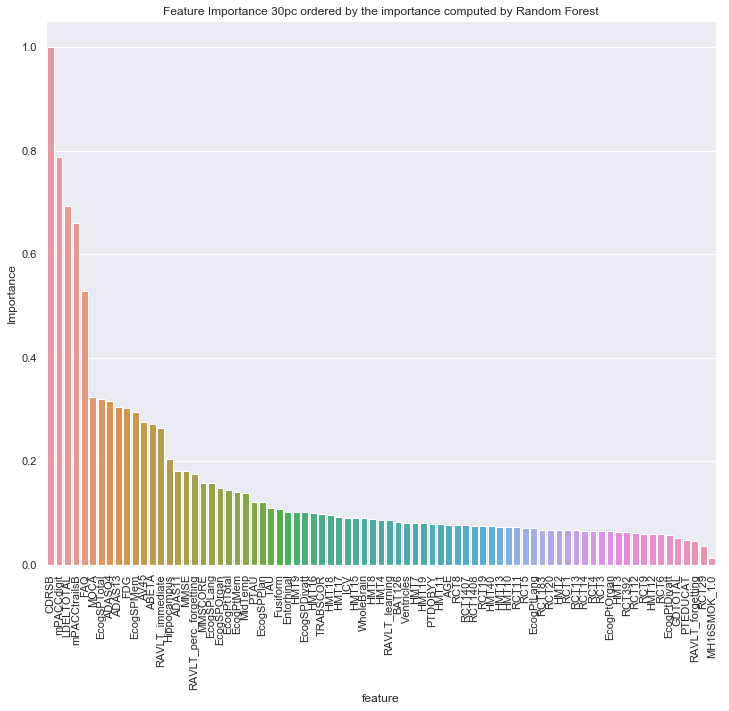

In [70]:
plt.figure(figsize=(12, 10))
sns.set(font_scale=1)
missing_vs_importance = missing_vs_importance.sort_values(['RandomForest'], ascending=False)
ax = sns.barplot(x = 'feature', y = 'RandomForest', data = missing_vs_importance)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Importance')
ax.set_title('Feature Importance 30pc ordered by the importance computed by Random Forest')
plt.savefig('FeatureImportance_top80Features.svg')